In [142]:
# Importing the required libraries and packages:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [163]:
# Importing the dataset:
df = pd.read_csv('bike_buyers_clean.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [144]:
df.shape

(1000, 13)

In [145]:
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [146]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [147]:
categorical_features = ['Marital_Status', 'Gender', 'Education',
       'Occupation', 'Home_Owner', 'Commute Distance', 'Region','Purchased Bike']

In [148]:
# Encoding the Commute_Distance feature with average in the range provided for each category.
df['Commute Distance'] = df['Commute Distance'].replace ({'0-1 Miles':0.5, '2-5 Miles':2.5, '5-10 Miles':7.5, '1-2 Miles':2.5, '10+ Miles':10.0})


In [149]:
# Purchased Bike is the target variable
df['Purchased Bike'] = df['Purchased Bike'].replace({'Yes': 1, 'No': 0})

In [150]:
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0.5,Europe,42,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0.5,Europe,43,0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2.5,Europe,60,0
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,7.5,Pacific,41,1
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0.5,Europe,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2.5,North America,54,1
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2.5,North America,35,1
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0.5,North America,38,1
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,2.5,North America,38,0


In [151]:
# Feature categories:
categorical_features = ['Marital Status', 'Gender', 'Education',
       'Occupation', 'Home Owner', 'Region']
numerical_features = ['Income', 'Children','Cars','Age','Commute Distance']
target_variable = ['Purchased Bike']


Ploting the distribution of Categorical features using barcharts:
Barcharts are used to visualize the distribution of a categorical variable. A bar chart shows a bar for every level of the variable, whereas the histogram shows a range of values for the variable.

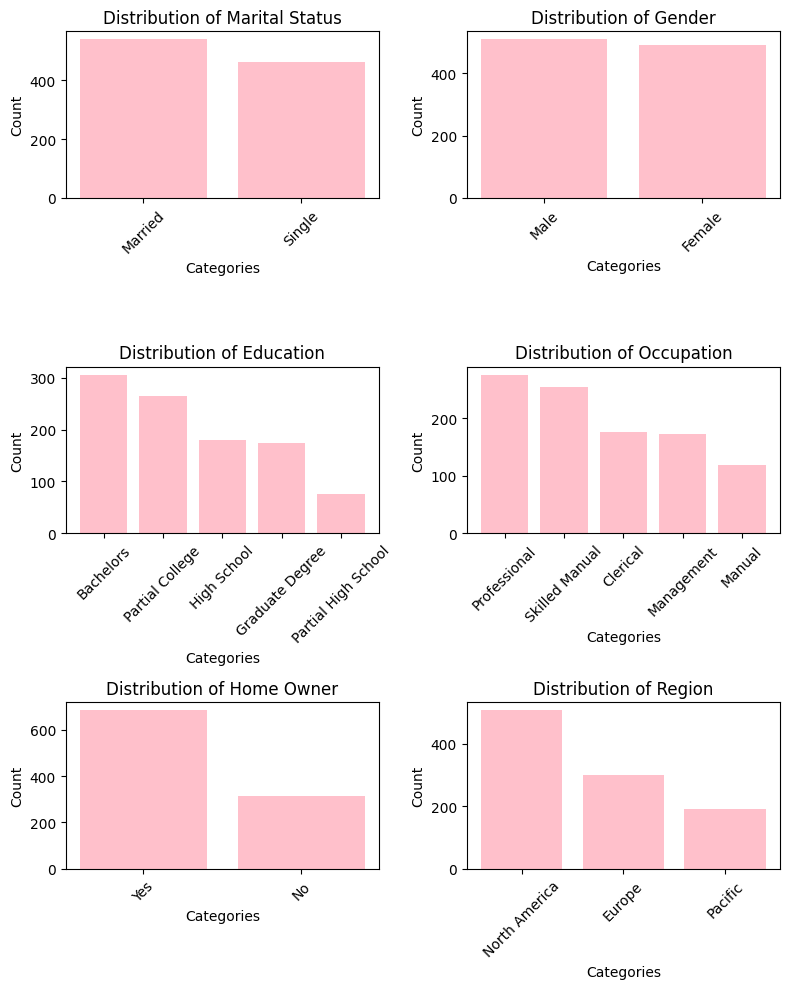

In [152]:
%matplotlib inline
fig, axes = plt.subplots(3,2, figsize=(8,10))
axes = axes.flatten()
# Plotting each categorical feature's distribution
for i, feature in enumerate(categorical_features):
    category_counts = df[feature].value_counts()

    axes[i].bar(category_counts.index, category_counts.values, color = 'pink')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis = 'x', rotation = 45)
    
    
plt.tight_layout()
plt.show()

    

In [153]:
# Importing various statistical packages for statistical analysis:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm,uniform,poisson
from scipy.stats import chisquare
from scipy.stats import chi2
from statsmodels.graphics.gofplots import qqplot

Q-Q plot for checking if the numerical features are normally distributed:
The quantile-quantile( q-q plot) plot is a graphical method for determining if a dataset follows a certain probability distribution or whether two samples of data came from the same population or not. Q-Q plots are particularly useful for assessing whether a dataset is normally distributed or if it follows some other known distribution. It works by comparing the quantiles of the observed data to the quantiles of the theoretical distribution. 

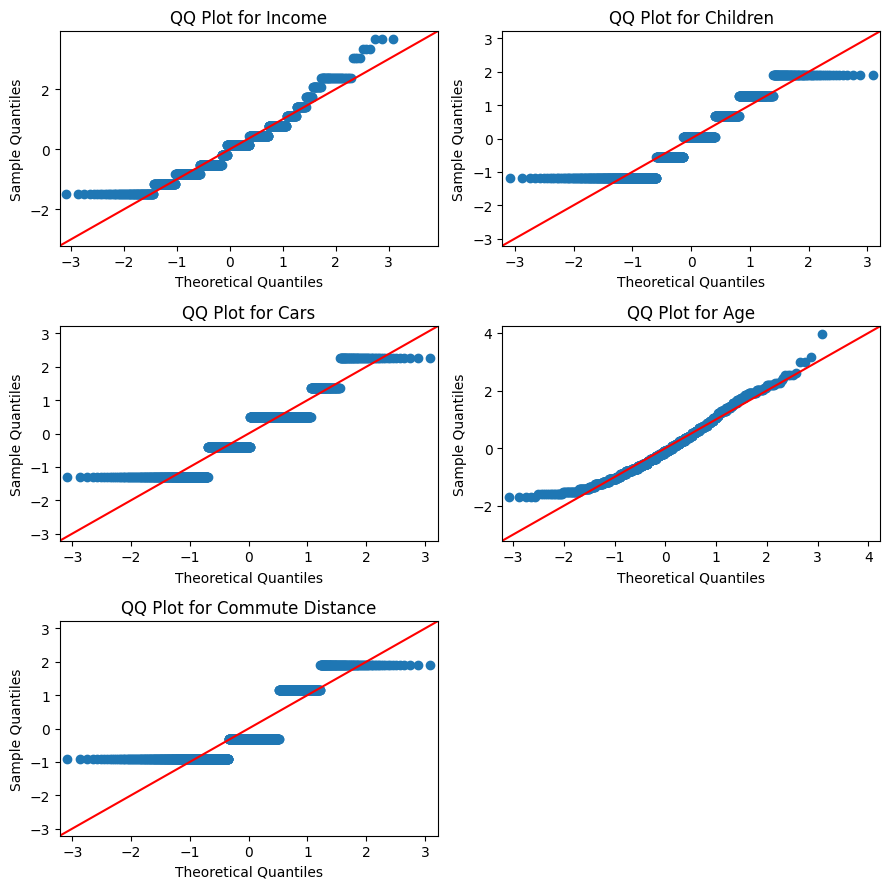

In [154]:
# List of numerical features:
numerical_features = ['Income', 'Children','Cars','Age','Commute Distance']

fig, axes = plt.subplots(3,2, figsize = (9,9))
axes = axes.flatten()

# Create QQ plots for each numerical feature:
for i, feature in enumerate(numerical_features):
    sm.qqplot(df[feature], line = '45',fit = True, ax = axes[i])
    axes[i].set_title(f'QQ Plot for {feature}')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')
    
# layout adjustment:    
if len(numerical_features) % 2 != 0: # deleting any blank plots
    fig.delaxes(axes[-1])
    
plt.tight_layout()
plt.show()

From the above plot, it can be inferred that income and age variables are very likely to be normally distributed.


Plotting the distribution of numerical features using histograms

A histogram is a chart that plots the distribution of a numeric variable's values as a series of bars. Each bar typically covers a range of numeric values called a bin or class. Each bar represents a range of values, and its height indicates how many data points are inside that range. 
A Density Plot visualises the distribution of data over a continuous interval or time period. A density plot uses a smooth curve to represent the data distribution. Instead of showing counts, it displays the proportion of data points within each range, providing a continuous and visually appealing estimate of the distribution, particularly useful for larger datasets.


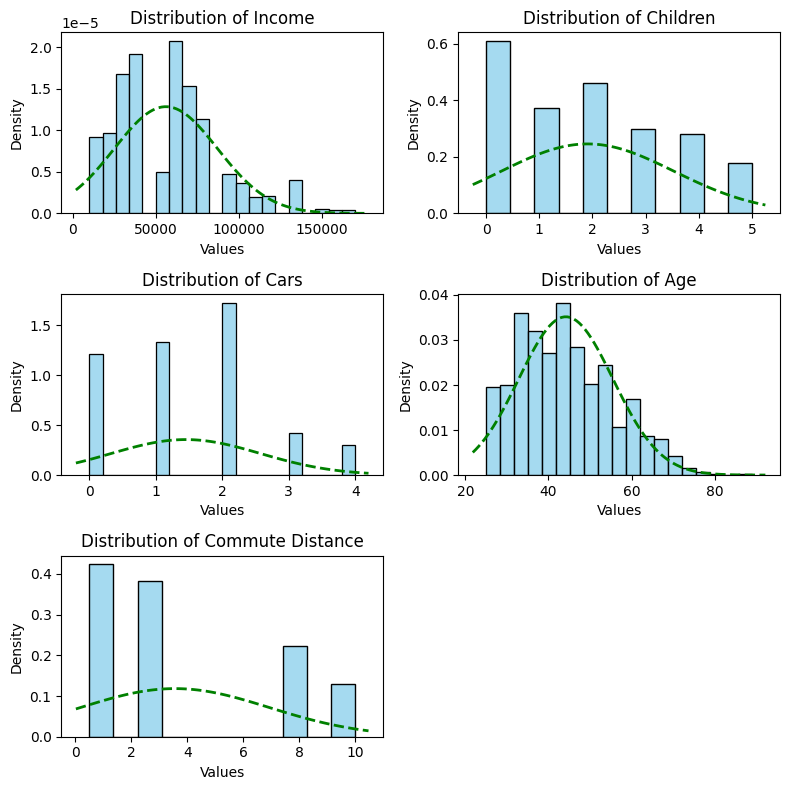

In [155]:
fig, axes = plt.subplots(3,2,figsize = (8,8))
axes = axes.flatten()
# Histogram with density
for i, feature in enumerate(numerical_features):
    sns.histplot(data = df, x = feature, ax= axes[i], color = 'skyblue', stat = 'density')
# Normal distribution curve
    mean, std_dev = np.mean(df[feature]), np.std(df[feature])
    x_min, x_max = axes[i].get_xlim() # Gets the current x-axis limits of the histogram so that the curve matches its range.
    x = np.linspace(x_min,x_max,100) # Creates 100 evenly spaced values between xmin and xmax for the x-axis of the curve.
    y = norm.pdf (x,mean,std_dev)
    axes[i].plot(x,y,color = 'green', linestyle ='--', linewidth =2) # Plots the red dashed normal curve on top of the histogram.
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()
    
    
    

HYPOTHESIS TESTING

1.Income group dependency on the target variable:
Feature description -> Continuous, Numerical and Normal -> Z test Two Sample  can be used. 

Z test is a statistical test that is conducted on normally distributed data to check if there is a difference in means of two data sets.The two sample z test involves an alternative hypothesis that claims there is a significant difference between the means of two populations while the null hypothesis claims there is no significant difference. 
Here we are testing whether a numerical feature (like income, age, etc.) differs significantly between two groups defined by a binary target variable (like Purchased Bike = 0, Purchased Bike = 1).

Ho = 'There is no significant difference in income between those who purchased a bike and those who didn't'
aA = 'There is a significant difference in income between those who purchased a bike and those who did\'t'


In [156]:
from statsmodels.stats.weightstats import ztest
def z_test_two_groups(ho,ha,df,feature,target):
    group1 = df[df['Purchased Bike'] == 1][feature].dropna()
    group2 = df[df['Purchased Bike'] == 0][feature].dropna()

    # perform two-sample z-test
    z_stat, p_value = ztest(group1,group2, value = 0, alternative = 'two-sided')

    print(f'Z-statistic : {z_stat:.3f}')
    print(f'P-value : {p_value:.4f}')
    alpha = 0.05

    if p_value < alpha:
        print(f'Reject the Null Hypothesis: {ha}.')
    else:
        print(f'Failed to reject the Null Hypothesis: {ho}.')

HO = 'There is no significant difference in income between those who purchased a bike and those who didn\'t'
HA = 'There is a significant difference in income between those who purchased a bike and those who didn\'t'
z_test_two_groups(HO,HA,df,feature='Income',target='Purchased Bike')
 

Z-statistic : 1.338
P-value : 0.1810
Failed to reject the Null Hypothesis: There is no significant difference in income between those who purchased a bike and those who didn't.


In [157]:
# Alternate way of finding Z -statistics and P-value
from scipy.stats import norm
import numpy as np

def z_test_two_sample(ho, ha, column, df, target='Purchased Bike'):
    # Overall standard deviation
    std_dev = np.std(df[column]) 

    # Group values
    group1 = df[df[target] == 1][column].dropna()
    group0 = df[df[target] == 0][column].dropna()

    # Stats
    mean1, mean0 = group1.mean(), group0.mean()
    n1, n0 = len(group1), len(group0)

    # Print group info""
    print(f"Mean ({target}=1): {mean1:.2f}, Count: {n1}")
    print(f"Mean ({target}=0): {mean0:.2f}, Count: {n0}")
    print(f"Population Std Dev of '{column}': {std_dev:.2f}\n")

    # Z-test formula
    se = std_dev * np.sqrt(1/n1 + 1/n0)
    z_stat = (mean1 - mean0) / se
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))

    # Output
    print(f"Z-statistic: {z_stat:.3f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f"Reject the Null Hypothesis: {ha}")
    else:
        print(f"Fail to Reject the Null Hypothesis: {ho}")

z_test_two_sample(
    ho="There is no significant difference in income between bike purchasers and non-purchasers.",
    ha="There is significant difference in income between bike purchasers and non-purchasers.",
    column="Income",
    df=df
)

Mean (Purchased Bike=1): 57505.20, Count: 481
Mean (Purchased Bike=0): 54874.76, Count: 519
Population Std Dev of 'Income': 31066.07

Z-statistic: 1.338
P-value: 0.1810
Fail to Reject the Null Hypothesis: There is no significant difference in income between bike purchasers and non-purchasers.


2. Dependency of 'Age' feature on the target variable:
   

In [158]:
df.Age.describe()

count    1000.000000
mean       44.190000
std        11.353537
min        25.000000
25%        35.000000
50%        43.000000
75%        52.000000
max        89.000000
Name: Age, dtype: float64

Feature description -> Continuous, Numerical and Normal -> Z test Two Sample  can be used. 

In [ ]:
z_test_two_sample(
    ho="There is no significant difference in age between bike purchasers and non-purchasers.",
    ha="There is significant difference in age between bike purchasers and non-purchasers.",
    column="Age",
    df=df
)

In [164]:
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


3. Children group dependency on the target
Feature description -> Discrete and Categorical -> Chi Square Two Proportion Test
Testing if the proportion of bike purchases differ between two groups of a categorical variable:
0 children
1–5 children
'

In [165]:
df['Children_Group'] = df['Children'].apply(lambda x: '0' if x == 0 else '1-5') # group Children into two categories (0 and 1-5)

In [172]:
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Children_Group
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,1-5
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,1-5
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,1-5
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes,0
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes,1-5
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes,1-5
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes,1-5
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No,1-5


In [173]:
df['Children_Group'].value_counts()

Children_Group
1-5    723
0      277
Name: count, dtype: int64

In [174]:
HO = 'There is no significant difference in the proportion of individuals with 0 children who purchased a bike compared to those with 1-5 children who purchased a bike'
HA = 'There is a significant difference in the proportion of individuals with 0 children who purchased a bike compared to those with 1-5 children who purchased a bike'

contingency_table = pd.crosstab(df['Children_Group'], df['Purchased Bike'])
print(contingency_table)

from scipy.stats import chi2_contingency

chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
print(f'Chi-square statistic: {chi2:.2f}')
print(f'P-value: {p_value:.4f}')

if p_value < alpha:
    print(f'Reject the Null Hypothesis: {HA}.')
else:
    print(f'Failed to reject the Null Hypothesis: {HO}.')



Purchased Bike   No  Yes
Children_Group          
0               137  140
1-5             382  341
Chi-square statistic: 0.78
P-value: 0.3757
Failed to reject the Null Hypothesis: There is no significant difference in the proportion of individuals with 0 children who purchased a bike compared to those with 1-5 children who purchased a bike.


Dependency of the Categorical features on the target using Chi Square test

Chi-square test for independence is used to determine if there's a statistical association between a categorical variable and bike purchase.

In [160]:
from scipy.stats import chi2_contingency
def chi_square_test(df, column):
    contingency_table = pd.crosstab(df[column],df['Purchased Bike']) # build the contingency table
    chi2, p_value, _,_ = chi2_contingency(contingency_table) # Chi-square test

    H0 = f'There is no association between {column} and bike purchase.'
    HA = f'There is an association between {column} and bike purchase.'

    print(f'\nChi-square Test for: {column}')
    print(f'Chi-square statistic: {chi2:.2f}')
    print(f'P-value: {p_value:.4f}')

    alpha = 0.05
    if p_value < alpha:
        print("Reject the Null Hypothesis")
        print(f"Conclusion: {HA}\n")
    else:
        print("Failed to reject the Null Hypothesis")
        print(f"Conclusion: {H0}\n") 


In [161]:
chi_square_test(df,'Gender')
chi_square_test(df,'Marital Status')
chi_square_test(df,'Education')
chi_square_test(df,'Occupation')
chi_square_test(df,'Home Owner')
chi_square_test(df,'Region')
chi_square_test(df,'Cars')
chi_square_test(df,'Commute Distance')


Chi-square Test for: Gender
Chi-square statistic: 0.09
P-value: 0.7681
Failed to reject the Null Hypothesis
Conclusion: There is no association between Gender and bike purchase.


Chi-square Test for: Marital Status
Chi-square statistic: 11.54
P-value: 0.0007
Reject the Null Hypothesis
Conclusion: There is an association between Marital Status and bike purchase.


Chi-square Test for: Education
Chi-square statistic: 25.33
P-value: 0.0000
Reject the Null Hypothesis
Conclusion: There is an association between Education and bike purchase.


Chi-square Test for: Occupation
Chi-square statistic: 8.01
P-value: 0.0914
Failed to reject the Null Hypothesis
Conclusion: There is no association between Occupation and bike purchase.


Chi-square Test for: Home Owner
Chi-square statistic: 0.29
P-value: 0.5872
Failed to reject the Null Hypothesis
Conclusion: There is no association between Home Owner and bike purchase.


Chi-square Test for: Region
Chi-square statistic: 13.75
P-value: 0.0010
Reject 